In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 138.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=978269de98689101f3ee8d6a58512d5d012503c72e17bd12535e57a305c62119
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install -U pymorphy2-dicts-ru

In [ ]:
!pip install pyarrow

In [1]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import random

import warnings
warnings.filterwarnings("ignore")



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data from 'https://www.kaggle.com/datasets/borisenkogeorgiy/all-tg-news?resource=download'
df = pd.read_parquet('/content/drive/MyDrive/all_data_small.parquet')
df.head()

,date,message_raw,message_lemm,fwd_from,views,forwards,source
0,2015-11-05 11:20:13,economika новости экономики кратко,economika новость экономика кратко,None,557.0,3.0,economika
1,2015-11-05 11:28:24,Авиакомпания Победа в ближайшие дни начинает п...,авиакомпания победа близкий день начинать прод...,None,531.0,0.0,economika
2,2015-11-05 17:50:24,Реальная заработная плата в этом году снизится...,реальный заработный плата год снижаться 89 про...,None,482.0,0.0,economika
3,2015-11-05 20:25:52,"Новый гендиректор Трансаэро увольняется, не пр...",новый гендиректор трансаэро увольняться прораб...,None,346.0,0.0,economika
4,2015-11-05 20:48:28,"Инфляция с начала года составляет 11,2%",инфляция начало год составлять 11 2,None,328.0,0.0,economika


In [4]:
df['month'] = df['date'].dt.to_period('M')
df

,date,message_raw,message_lemm,fwd_from,views,forwards,source,month
0,2015-11-05 11:20:13,economika новости экономики кратко,economika новость экономика кратко,None,557.0,3.0,economika,2015-11
1,2015-11-05 11:28:24,Авиакомпания Победа в ближайшие дни начинает п...,авиакомпания победа близкий день начинать прод...,None,531.0,0.0,economika,2015-11
2,2015-11-05 17:50:24,Реальная заработная плата в этом году снизится...,реальный заработный плата год снижаться 89 про...,None,482.0,0.0,economika,2015-11
3,2015-11-05 20:25:52,"Новый гендиректор Трансаэро увольняется, не пр...",новый гендиректор трансаэро увольняться прораб...,None,346.0,0.0,economika,2015-11
4,2015-11-05 20:48:28,"Инфляция с начала года составляет 11,2%",инфляция начало год составлять 11 2,None,328.0,0.0,economika,2015-11
...,...,...,...,...,...,...,...,...
1125179,2023-07-24 23:07:42,США не поддерживают украинские атаки внутри Ро...,сша поддерживать украинский атака внутри росси...,None,249234.0,253.0,rian_ru,2023-07
1125180,2023-07-24 23:08:28,etf мнение крипто Если SEC одобрит BTCETF от B...,etf мнение крипто sec одобрять btcetf blackroc...,None,18029.0,177.0,markettwits,2023-07
1125181,2023-07-24 23:12:05,🇺🇸NXPI отчетность NXPI Semiconductors Adj EPS:...,nxpi отчетность nxpi semiconductors adj eps 3...,None,17046.0,3.0,markettwits,2023-07
1125182,2023-07-24 23:20:34,крипто презентация из презентации все очевидно...,крипто презентация презентация очевидно каждый...,None,17227.0,225.0,markettwits,2023-07


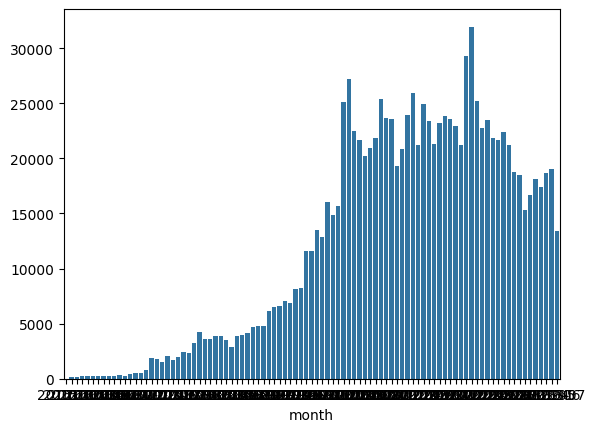

In [5]:
grouped = df.groupby('month').count()['message_raw']
sns.barplot(y = grouped.values, x = grouped.index);

In [6]:
df.drop_duplicates(['message_lemm'], inplace = True)
df.shape

(1122207, 8)

In [55]:
import numpy as np
s = '100,77	100,96	100,63	100,46	100,44	100,41	100,36	100,54	100,01	100,17	100,43	100,44	100,40	100,62	100,22	100,13	100,33	100,37	100,61	100,07	99,46	99,85	100,20	100,22	100,42	100,31	100,21	100,29	100,38	100,38	100,49	100,27	100,01	100,16	100,35	100,50	100,84	101,01	100,44	100,32	100,29	100,34	100,04	100,20	99,76	99,84	100,13	100,28	100,36	100,40	100,33	100,55	100,83	100,27	100,22	100,35	99,96	99,93	100,43	100,71	100,83	100,67	100,78	100,66	100,58	100,74	100,69	100,31	100,17	100,60	101,11	100,96	100,82	100,99	101,17	107,61	101,56	100,12	99,65	99,61	99,48	100,05	100,18	100,37	100,78	100,84	100,46	100,37	100,38	100,31	100,37	100,63	100,28'
s = s.replace(',', '.')
ipc = np.array(list(map(float, s.split('\t'))))
ipc -= 100

In [8]:
pivot = pd.DataFrame({'date': grouped.index, 'ipc': ipc})
pivot

,date,ipc
0,2015-11,0.77
1,2015-12,0.96
2,2016-01,0.63
3,2016-02,0.46
4,2016-03,0.44
...,...,...
88,2023-03,0.38
89,2023-04,0.31
90,2023-05,0.37
91,2023-06,0.63


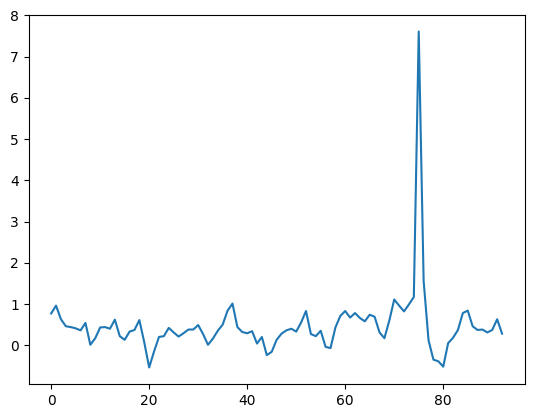

In [9]:
plt.plot(ipc)

In [11]:
top_words = Counter([word for sent in df['message_lemm'] for word in sent.split()])
top_words.most_common(15)

[('год', 411521),
 ('россия', 283826),
 ('компания', 213405),
 ('1', 203309),
 ('который', 184812),
 ('сша', 178700),
 ('это', 176878),
 ('млрд', 153937),
 ('российский', 147778),
 ('2', 146738),
 ('рубль', 144149),
 ('рф', 142278),
 ('акция', 133076),
 ('сообщать', 130579),
 ('5', 128025)]

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def clear(text):
  words = text.split()
  res = []
  for w in words:
    if w.isalpha():
      res.append(w)
  return ' '.join(res)
df['lemm_cleaned'] = df['message_lemm'].apply(lambda x: clear(x))

In [15]:
vectorizer = CountVectorizer(decode_error='ignore')

In [16]:
vectors = vectorizer.fit_transform(list(df['lemm_cleaned'].values))

In [17]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaaaaamoji', ..., 'მთავარი', 'ヽー', 'ﬁrm'],
      dtype=object)

In [18]:
vectors.shape[0]

1122207

In [19]:
lda = LatentDirichletAllocation(n_components=15, learning_method = 'online', max_iter = 4, random_state = 0)
lda.fit(vectors)

LatentDirichletAllocation(learning_method='online', max_iter=4, n_components=15,
                          random_state=0)

In [20]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print()

In [21]:
print_top_words(lda, vectorizer.get_feature_names_out(), 10)


Topic #0:человек украинский который изза это число сообщение информация данные проблема


Topic #1:новость риа размер мир выплачивать данный карта крипто момент ноябрь


Topic #2:газ украина газпром суд сторона россиянин киев связь агентство компания


Topic #3:новый год получать это финансовый первый компания проект россия мочь


Topic #4:россия российский страна это который санкция заявлять мочь поставка результат


Topic #5:сша рынок цена нефть рост доллар уровень торги власть прогноз


Topic #6:вводить ограничение трлн налог запрет недвижимость великобритания банковский потолок платеж


Topic #7:год млрд рубль дивиденд составлять источник млн руб компания вырастать


Topic #8:месяц счет конец возможность бизнес акционер случай стоимость становиться последний


Topic #9:глава заявлять президент путин сша россия владимир рф тонна нато


Topic #10:который свой весь работа ес планировать правительство мера объявлять производство


Topic #11:акция китай цб ставка рф банк индекс россия 

In [ ]:
from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()
model = pipeline(model="seara/rubert-tiny2-russian-sentiment")

In [31]:
df['sentiment'] = df['lemm_cleaned'].progress_apply(lambda x: model(x)[0]['label'])

100%|██████████| 1122207/1122207 [3:33:35<00:00, 87.57it/s]


In [32]:
df.to_parquet('ips_data2.parquet')
import shutil
shutil.copy('ips_data2.parquet', '/content/drive/MyDrive')

'/content/drive/MyDrive/ips_data2.parquet'

In [38]:
X = lda.transform(vectors)

In [39]:
X.shape

(1122207, 15)

In [42]:
for i in range(15):
  df[f'topic_{i}'] = X[:, i]

In [41]:
df['sentiment_coded'] = 1*(df['sentiment'] == 'positive').values+0*(df['sentiment'] == 'neutral').values-1*(df['sentiment'] == 'negative').values

In [44]:
df.head()

,date,message_raw,message_lemm,fwd_from,views,forwards,source,month,lemm_cleaned,topic_0,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,sentiment,sentiment_coded
0,2015-11-05 11:20:13,economika новости экономики кратко,economika новость экономика кратко,None,557.0,3.0,economika,2015-11,economika новость экономика кратко,0.013333,...,0.013333,0.213333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,neutral,0
1,2015-11-05 11:28:24,Авиакомпания Победа в ближайшие дни начинает п...,авиакомпания победа близкий день начинать прод...,None,531.0,0.0,economika,2015-11,авиакомпания победа близкий день начинать прод...,0.006061,...,0.160273,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,0.006061,positive,1
2,2015-11-05 17:50:24,Реальная заработная плата в этом году снизится...,реальный заработный плата год снижаться 89 про...,None,482.0,0.0,economika,2015-11,реальный заработный плата год снижаться процент,0.009524,...,0.866667,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,neutral,0
3,2015-11-05 20:25:52,"Новый гендиректор Трансаэро увольняется, не пр...",новый гендиректор трансаэро увольняться прораб...,None,346.0,0.0,economika,2015-11,новый гендиректор трансаэро увольняться прораб...,0.009524,...,0.009524,0.152381,0.009524,0.009524,0.009524,0.009524,0.009524,0.009524,neutral,0
4,2015-11-05 20:48:28,"Инфляция с начала года составляет 11,2%",инфляция начало год составлять 11 2,None,328.0,0.0,economika,2015-11,инфляция начало год составлять,0.013333,...,0.609225,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,neutral,0


In [47]:
X = df.drop(columns = ['date', 'message_raw', 'message_lemm', 'fwd_from', 'source', 'lemm_cleaned', 'sentiment']).groupby('month').mean()
X.head()

,views,forwards,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,sentiment_coded
month,,,,,,,,,,,,,,,,,,
2015-11,314.533333,0.200000,0.010951,0.054174,0.010951,0.058570,0.119054,0.117269,0.010951,0.208225,0.033808,0.061586,0.020475,0.187792,0.010951,0.084294,0.010951,0.000000
2015-12,209.880000,0.032000,0.036480,0.027030,0.040107,0.075850,0.139974,0.177311,0.040555,0.123312,0.046569,0.046616,0.044727,0.084536,0.024499,0.041168,0.051266,-0.136000
2016-01,485.964824,0.010050,0.031916,0.024465,0.044093,0.090500,0.149163,0.168879,0.027786,0.142175,0.050920,0.029443,0.061692,0.090160,0.030588,0.022095,0.036126,-0.160804
2016-02,829.615385,0.000000,0.044243,0.035122,0.052422,0.097833,0.131851,0.100391,0.037577,0.120099,0.051672,0.047161,0.068555,0.101623,0.028910,0.025947,0.056594,-0.123077
2016-03,986.718631,0.015209,0.045842,0.036589,0.053215,0.088635,0.148499,0.087817,0.035569,0.132488,0.044136,0.042141,0.073630,0.079759,0.053100,0.025975,0.052606,-0.155894


In [56]:
y = ipc
y

array([ 0.77,  0.96,  0.63,  0.46,  0.44,  0.41,  0.36,  0.54,  0.01,
        0.17,  0.43,  0.44,  0.4 ,  0.62,  0.22,  0.13,  0.33,  0.37,
        0.61,  0.07, -0.54, -0.15,  0.2 ,  0.22,  0.42,  0.31,  0.21,
        0.29,  0.38,  0.38,  0.49,  0.27,  0.01,  0.16,  0.35,  0.5 ,
        0.84,  1.01,  0.44,  0.32,  0.29,  0.34,  0.04,  0.2 , -0.24,
       -0.16,  0.13,  0.28,  0.36,  0.4 ,  0.33,  0.55,  0.83,  0.27,
        0.22,  0.35, -0.04, -0.07,  0.43,  0.71,  0.83,  0.67,  0.78,
        0.66,  0.58,  0.74,  0.69,  0.31,  0.17,  0.6 ,  1.11,  0.96,
        0.82,  0.99,  1.17,  7.61,  1.56,  0.12, -0.35, -0.39, -0.52,
        0.05,  0.18,  0.37,  0.78,  0.84,  0.46,  0.37,  0.38,  0.31,
        0.37,  0.63,  0.28])

In [57]:
X.shape

(93, 18)

In [59]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [60]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = ['month']).values, y, train_size = 0.7, random_state = 42)

In [63]:
cb = CatBoostRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)

Learning rate set to 0.026584
0:	learn: 0.9622219	total: 48.2ms	remaining: 48.1s
1:	learn: 0.9561172	total: 49.8ms	remaining: 24.8s
2:	learn: 0.9502553	total: 51.3ms	remaining: 17.1s
3:	learn: 0.9445031	total: 52.9ms	remaining: 13.2s
4:	learn: 0.9387540	total: 54.4ms	remaining: 10.8s
5:	learn: 0.9329792	total: 55.8ms	remaining: 9.25s
6:	learn: 0.9268775	total: 57.4ms	remaining: 8.14s
7:	learn: 0.9212029	total: 58.8ms	remaining: 7.29s
8:	learn: 0.9151531	total: 60.3ms	remaining: 6.64s
9:	learn: 0.9094367	total: 61.8ms	remaining: 6.11s
10:	learn: 0.9040320	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8984163	total: 64.5ms	remaining: 5.31s
12:	learn: 0.8928940	total: 66.1ms	remaining: 5.02s
13:	learn: 0.8874695	total: 67.7ms	remaining: 4.77s
14:	learn: 0.8822924	total: 69.2ms	remaining: 4.54s
15:	learn: 0.8769936	total: 70.6ms	remaining: 4.34s
16:	learn: 0.8718566	total: 72.3ms	remaining: 4.18s
17:	learn: 0.8665388	total: 73.8ms	remaining: 4.03s
18:	learn: 0.8614416	total: 75.2ms	remaining

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
print(f'Результаты линейного алгоритма: {mean_squared_error(y_test, lr.predict(X_test))}' )
print(f'Результаты алгоритма случайного леса: {mean_squared_error(y_test, rf.predict(X_test))}' )
print(f'Результаты алгоритма бустинга: {mean_squared_error(y_test, cb.predict(X_test))}' )
print(f'Результаты алгоритма опорных векторов: {mean_squared_error(y_test, svr.predict(X_test))}' )

Результаты линейного алгоритма: 0.5486032358650023
Результаты алгоритма случайного леса: 0.39752251035714364
Результаты алгоритма бустинга: 0.056572323275130225
Результаты алгоритма опорных векторов: 0.06250426954393053


In [66]:
X.index

PeriodIndex(['2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
             '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
             '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
             '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
             '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
             '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
             '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
             '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10',
             '2021-11', '2021-12', '2022-01', '2022-

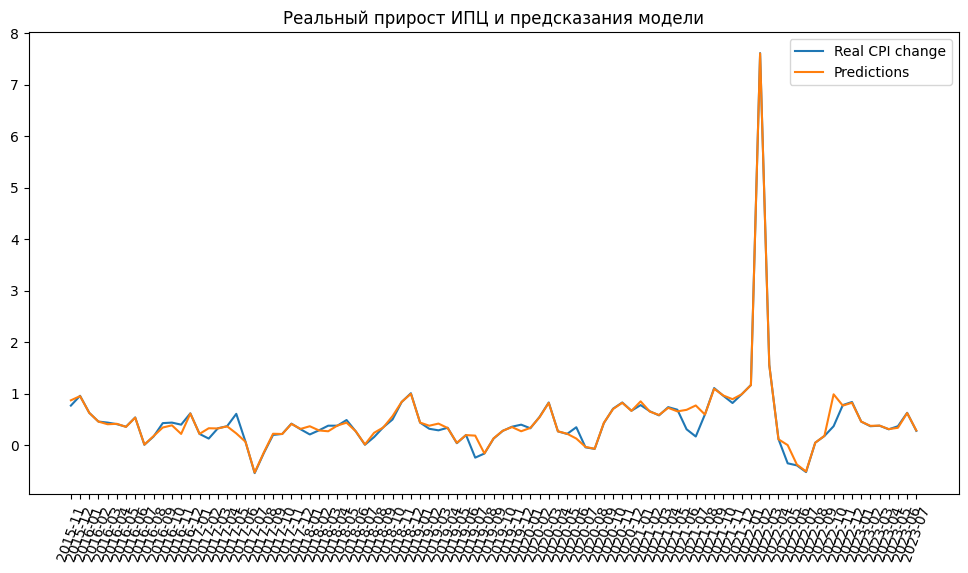

In [71]:
plt.figure(figsize = (12, 6))
plt.title('Реальный прирост ИПЦ и предсказания модели')
plt.plot(ipc, label = 'Real CPI change')
plt.plot(cb.predict(X.values), label = 'Predictions')
plt.xticks(np.arange(len(ipc)), X.index, rotation = 70)
plt.legend();